In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(400, 700, 301)
R_scan_05 = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
R_scan_15 = pd.read_csv('./spectrum/LENS/rev1/R_15_B.csv')['SCAN'].values
R_scan_30 = pd.read_csv('./spectrum/LENS/rev1/R_30_B.csv')['SCAN'].values
# open material (LENS)
air = ml.Non_Dispersion(1)
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')
sodalime = ml.open_material('sodalime_Nanya', 'Material')

ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

#SiO2.k = 10**-5
#SiN.k = 10**-5
#OC.k = 10**-5

# hypothesis
R_hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_05 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_15 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1],  th[2], th[3], th[4], th[5], None]
).reflectance(wl, 16)

R_hypo_30 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1],  th[2], th[3], th[4], th[5], None]
).reflectance(wl, 32)

In [3]:
# fitting (LENS)
FOM = lambda th: sum(
    abs(R_scan_05-100*R_hypo_05(th))
    #+abs(R_hypo_tra(th)-R_hypo_05(th))
    #abs(target_R15-hypo_R15(tht))+
    #abs(target_R30-hypo_R30(tht))
)

In [7]:
sol = differential_evolution(
    FOM, [
        (1600, 2600), (4, 40), (10, 80), (20, 40), (10, 80), (10, 80)
    ],
    disp = True, 
    polish = False, 
    popsize = 25, 
    mutation = 0.5, 
    recombination = 0.9, 
    strategy = 'rand1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 281.393
differential_evolution step 2: f(x)= 281.393
differential_evolution step 3: f(x)= 276.27
differential_evolution step 4: f(x)= 255.472
differential_evolution step 5: f(x)= 188.097
differential_evolution step 6: f(x)= 188.097
differential_evolution step 7: f(x)= 188.097
differential_evolution step 8: f(x)= 188.097
differential_evolution step 9: f(x)= 188.097
differential_evolution step 10: f(x)= 141.245
differential_evolution step 11: f(x)= 141.245
differential_evolution step 12: f(x)= 141.245
differential_evolution step 13: f(x)= 141.245
differential_evolution step 14: f(x)= 131.657
differential_evolution step 15: f(x)= 131.657
differential_evolution step 16: f(x)= 131.657
differential_evolution step 17: f(x)= 131.657
differential_evolution step 18: f(x)= 131.657
differential_evolution step 19: f(x)= 131.657
differential_evolution step 20: f(x)= 131.657
differential_evolution step 21: f(x)= 131.657
differential_evolution step 22: f(x)= 131.65

0.2826301561301731


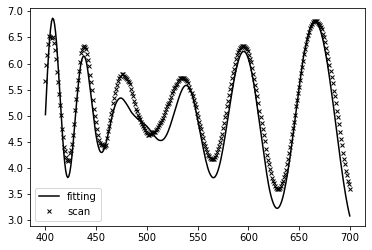

0.47379161098514677


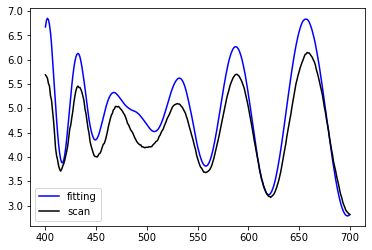

0.30107606605517523


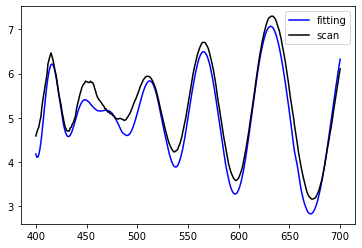

In [13]:
def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

f2 = [1707,12,27.1,20,37.1,12]
f3 = [2122.28929493,14.71580371,36.65970178,32.,45.,8.62266763]
f4 = [1729.79214328,14.48240497,38.032268,29.89295768,46.99689601,6.5993801 ]
f5 = [1728.01115927,14.3870235,38.11820806,29.69018659,46.6469324,6.95233569]
f6 = [1717.37238713,14.44418993,32.21384678,22.66133977,33.72499576,9.04278654]
tk = f6

plt.plot(wl, 100*R_hypo_05(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_05, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
plt.savefig('LENS_rev1_reflection_blacktap_05.png')
print(RMSE(100*R_hypo_05(tk),R_scan_05, 301))
plt.show()

plt.plot(wl, 100*R_hypo_15(tk), '-b', label = 'fitting')
plt.plot(wl, R_scan_15, '-k', label = 'scan')
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_reflection_blacktap_15.png')
print(RMSE(100*R_hypo_15(tk),R_scan_15, 301))
plt.show()

plt.plot(wl, 100*R_hypo_30(tk), '-b', label = 'fitting')
plt.plot(wl, R_scan_30, '-k', label = 'scan')
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_reflection_blacktap_30.png')
print(RMSE(100*R_hypo_30(tk),R_scan_30, 301))
plt.show()